In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline
import seaborn as sns
import pandas as pd
import math as mt
import scipy
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import researchpy as rp
import sys
import Bio
from Bio import SeqIO, SeqFeature
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import os

from IPython.display import display
pd.options.display.max_columns = 250
pd.options.display.max_rows = 800

Populating the interactive namespace from numpy and matplotlib


In [7]:
def build_snp_df(gff_dir,prefix,cds_start,cds_end):
    
    #parse in snpcalling and restrict to trfA_CDS
    count = 0
    for filename in os.listdir(gff_dir):
        sample_name=(filename.decode('utf-8').rstrip('.sorted.bam.var.txt'))
        sample = os.path.join(gff_dir, filename)
        if os.path.isfile(sample) and prefix in sample_name:
            df_sample = pd.read_table(sample.decode('utf-8'))
            df_cds = df_sample[df_sample.pos>cds_start]
            df_cds = df_cds[df_cds.pos<cds_end]
            #df_cds = df_sample.query("pos > cds_start & pos < cds_end")
            df_cds['Sample'] = sample_name
            
            df_cds.replace(to_replace = 0, value = 1, inplace=True)
            df_cds['norm_mismatch'] = df_cds.mismatches/df_cds.reads_all
            df_cds['norm_match'] = df_cds.matches/df_cds.reads_all
            df_cds['norm_A'] = df_cds['A']/df_cds.reads_all
            df_cds['norm_T'] = df_cds['T']/df_cds.reads_all
            df_cds['norm_C'] = df_cds['C']/df_cds.reads_all
            df_cds['norm_G'] = df_cds['G']/df_cds.reads_all
            
            aa_list = []
            aa_pos = []
            countaa = 1
            
            if count == 0:
                df_snp = df_cds.copy()
                count = 1
                
                for x in Seq(''.join(df_snp.ref)).translate():
                    aa_list.extend([x,x,x])
                    aa_pos.extend([countaa,countaa,countaa])
                    countaa=countaa+1
                
                
            if count == 1:
                df_snp = pd.concat([df_snp,df_cds])
            
    return df_snp
            



In [25]:
gff_dir = os.fsencode("/Users/MThompson/science/Shih_Agro/Matthew_SNP/")
df_pSa_snp=build_snp_df(gff_dir,'pSa',1016,1989)

In [26]:
df_pSa_snp

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G
544,Gent_pSa,1017,A,78889,67787,78868,67773,20,14,1,1,1,1,78868,67773,2,2,7,3,11,9,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000254,0.999734,0.999734,0.000089,0.000025,0.000139
545,Gent_pSa,1018,T,78960,67816,78933,67792,26,24,1,1,1,1,9,8,16,15,78933,67792,1,1,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000329,0.999658,0.000114,0.999658,0.000203,0.000013
546,Gent_pSa,1019,G,78942,67822,78913,67800,28,22,1,1,1,1,18,14,4,3,6,5,78913,67800,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000355,0.999633,0.000228,0.000076,0.000051,0.999633
547,Gent_pSa,1020,C,80911,69199,80888,69178,23,21,1,1,1,1,7,6,80888,69178,16,15,1,1,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000284,0.999716,0.000087,0.000198,0.999716,0.000012
548,Gent_pSa,1021,C,80658,69017,80642,69003,16,14,1,1,1,1,6,6,80642,69003,9,8,1,1,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000198,0.999802,0.000074,0.000112,0.999802,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,Gent_pSa,1984,C,78847,68893,78782,68845,65,48,1,1,2,1,28,25,78782,68845,33,20,4,3,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000824,0.999176,0.000355,0.000419,0.999176,0.000051
1331,Gent_pSa,1985,T,77956,68097,77906,68070,50,27,1,1,5,1,16,8,23,15,77906,68070,11,4,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000641,0.999359,0.000205,0.999359,0.000295,0.000141
1332,Gent_pSa,1986,T,75087,65534,75046,65509,41,25,1,1,3,1,14,8,24,14,75046,65509,3,3,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000546,0.999454,0.000186,0.999454,0.000320,0.000040
1333,Gent_pSa,1987,G,74904,65307,74846,65260,58,47,1,1,4,1,47,39,7,4,4,4,74846,65260,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000774,0.999226,0.000627,0.000053,0.000093,0.999226


In [56]:
gff_dir = os.fsencode("/Users/MThompson/science/Shih_Agro/Matthew_SNP/")
df_snp=build_snp_df(gff_dir,'pSa',1016,1989)
sample_meta = pd.read_csv('sample_groups_pSa.csv')
group_map = dict(zip(sample_meta['Sample'],sample_meta['Group']))
df_snp['Group'] = df_snp['Sample'].map(group_map)

aa_list = []
aa_pos = []

count = 1
for x in Seq(''.join(df_snp[df_snp.Sample=='pSa-unselected-rep1_S1_L001_mapping'].ref)).translate():
    aa_list.extend([x,x,x])
    aa_pos.extend([count,count,count])
    count=count+1

df_aa = pd.DataFrame([aa_list,aa_pos]).transpose()

df_aa['pos'] = df_snp[df_snp.Sample=='pSa-unselected-rep1_S1_L001_mapping'].pos.tolist()

aa_map = dict(zip(df_aa['pos'],df_aa[0]))
aapos_map = dict(zip(df_aa['pos'],df_aa[1]))

df_snp['AA'] = df_snp['pos'].map(aa_map)
df_snp['AApos'] = df_snp['pos'].map(aapos_map)
#df_snp['AApos'] = df_snp['AApos']-383
df_snp['AAInfo'] = df_snp.AA + df_snp.AApos.astype(str)




df_snp

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo
544,Gent_pSa,1017,A,78889,67787,78868,67773,20,14,1,1,1,1,78868,67773,2,2,7,3,11,9,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000254,0.999734,0.999734,0.000089,0.000025,0.000139,Selection_2,M,1,M1
545,Gent_pSa,1018,T,78960,67816,78933,67792,26,24,1,1,1,1,9,8,16,15,78933,67792,1,1,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000329,0.999658,0.000114,0.999658,0.000203,0.000013,Selection_2,M,1,M1
546,Gent_pSa,1019,G,78942,67822,78913,67800,28,22,1,1,1,1,18,14,4,3,6,5,78913,67800,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000355,0.999633,0.000228,0.000076,0.000051,0.999633,Selection_2,M,1,M1
547,Gent_pSa,1020,C,80911,69199,80888,69178,23,21,1,1,1,1,7,6,80888,69178,16,15,1,1,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000284,0.999716,0.000087,0.000198,0.999716,0.000012,Selection_2,P,2,P2
548,Gent_pSa,1021,C,80658,69017,80642,69003,16,14,1,1,1,1,6,6,80642,69003,9,8,1,1,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000198,0.999802,0.000074,0.000112,0.999802,0.000012,Selection_2,P,2,P2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,Gent_pSa,1984,C,78847,68893,78782,68845,65,48,1,1,2,1,28,25,78782,68845,33,20,4,3,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000824,0.999176,0.000355,0.000419,0.999176,0.000051,Selection_2,T,323,T323
1331,Gent_pSa,1985,T,77956,68097,77906,68070,50,27,1,1,5,1,16,8,23,15,77906,68070,11,4,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000641,0.999359,0.000205,0.999359,0.000295,0.000141,Selection_2,T,323,T323
1332,Gent_pSa,1986,T,75087,65534,75046,65509,41,25,1,1,3,1,14,8,24,14,75046,65509,3,3,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000546,0.999454,0.000186,0.999454,0.000320,0.000040,Selection_2,*,324,*324
1333,Gent_pSa,1987,G,74904,65307,74846,65260,58,47,1,1,4,1,47,39,7,4,4,4,74846,65260,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000774,0.999226,0.000627,0.000053,0.000093,0.999226,Selection_2,*,324,*324


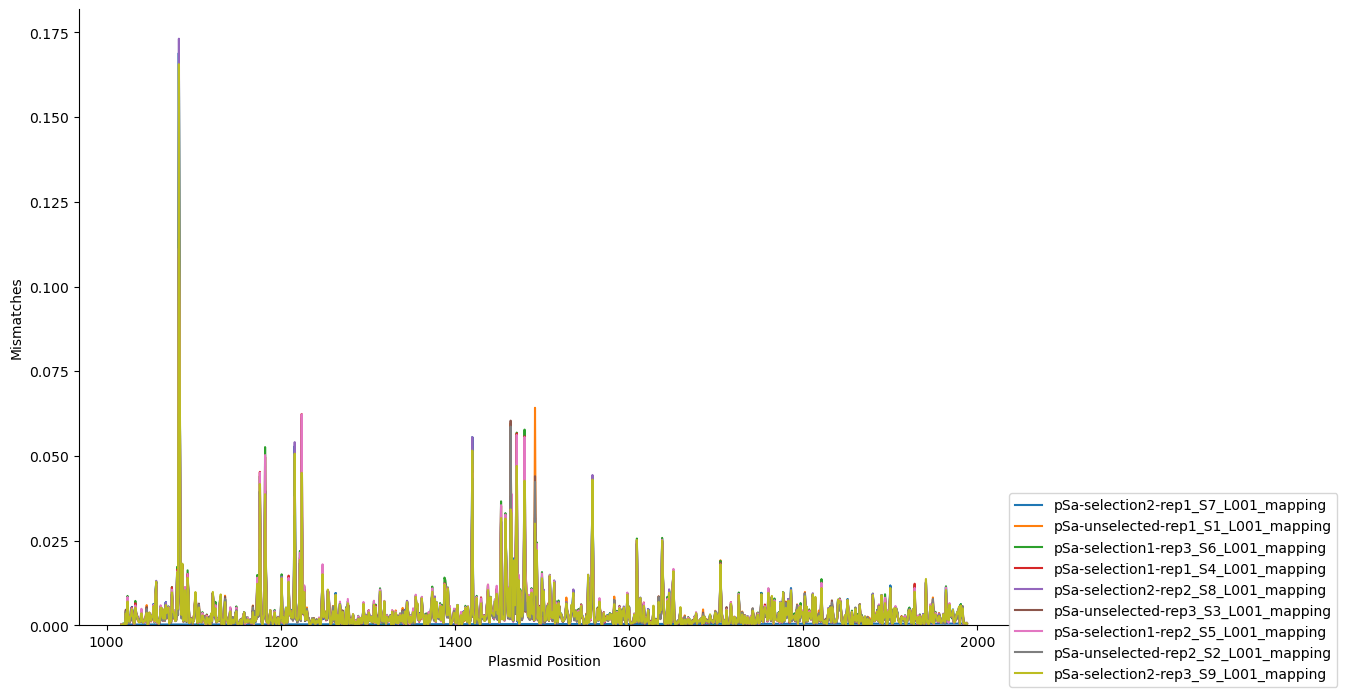

In [57]:
plt.figure(figsize=(12,8))
for cond in df_snp.Sample.unique():
    plt.plot(df_snp[df_snp.Sample==cond].pos,df_snp[df_snp.Sample==cond].norm_mismatch)
    
plt.legend(df_snp.Sample.unique(),loc=(1,-0.1))
plt.ylim(0,)
plt.ylabel('Mismatches')
plt.xlabel('Plasmid Position')
sns.despine()

In [58]:
df_snp.Sample.unique()

array(['pSa-selection2-rep1_S7_L001_mapping',
       'pSa-unselected-rep1_S1_L001_mapping',
       'pSa-selection1-rep3_S6_L001_mapping',
       'pSa-selection1-rep1_S4_L001_mapping',
       'pSa-selection2-rep2_S8_L001_mapping',
       'pSa-unselected-rep3_S3_L001_mapping',
       'pSa-selection1-rep2_S5_L001_mapping',
       'pSa-unselected-rep2_S2_L001_mapping',
       'pSa-selection2-rep3_S9_L001_mapping'], dtype=object)

In [59]:
df_mutant = df_snp[df_snp.Sample.isin(['pSa-selection2-rep1_S7_L001_mapping',
       'pSa-selection1-rep3_S6_L001_mapping',
       'pSa-selection1-rep1_S4_L001_mapping',
       'pSa-selection2-rep2_S8_L001_mapping',
       'pSa-selection1-rep2_S5_L001_mapping',
       'pSa-selection2-rep3_S9_L001_mapping'])]

In [60]:
df_mutant.sort_values(by='norm_mismatch',ascending=False).head(25)

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo
380,Gent_pSa,1083,G,93881,88217,77624,73089,16257,15128,1,1,1,1,16165,15044,88,80,4,4,77624,73089,1,1,pSa-selection2-rep2_S8_L001_mapping,0.173166,0.826834,0.172186,0.000043,0.000937,0.826834,Selection_2,E,23,E23
610,Gent_pSa,1083,G,81815,71967,67990,59953,13824,12014,1,1,1,1,13748,11951,74,61,2,2,67990,59953,1,1,pSa-selection2-rep1_S7_L001_mapping,0.168967,0.831021,0.168038,0.000024,0.000904,0.831021,Selection_2,E,23,E23
610,Gent_pSa,1083,G,81815,71967,67990,59953,13824,12014,1,1,1,1,13748,11951,74,61,2,2,67990,59953,1,1,pSa-selection2-rep1_S7_L001_mapping,0.168967,0.831021,0.168038,0.000024,0.000904,0.831021,Selection_2,E,23,E23
429,Gent_pSa,1083,G,64652,58452,53939,48829,10710,9621,3,2,1,1,10644,9561,61,55,5,5,53939,48829,1,1,pSa-selection2-rep3_S9_L001_mapping,0.165656,0.834297,0.164635,0.000077,0.000944,0.834297,Selection_2,E,23,E23
235,Gent_pSa,1083,G,45985,38557,40738,34287,5245,4268,2,2,1,1,5199,4229,44,37,2,2,40738,34287,1,1,pSa-selection1-rep3_S6_L001_mapping,0.114059,0.885898,0.113059,0.000043,0.000957,0.885898,Selection_1,E,23,E23
300,Gent_pSa,1083,G,75192,67097,66826,59714,8366,7383,1,1,2,2,8275,7300,86,78,5,5,66826,59714,1,1,pSa-selection1-rep2_S5_L001_mapping,0.111262,0.888738,0.110052,0.000066,0.001144,0.888738,Selection_1,E,23,E23
492,Gent_pSa,1083,G,84011,81959,74841,73056,9170,8903,1,1,1,1,9084,8818,84,83,2,2,74841,73056,1,1,pSa-selection1-rep1_S4_L001_mapping,0.109152,0.890848,0.108129,0.000024,0.001000,0.890848,Selection_1,E,23,E23
430,Gent_pSa,1084,A,66366,59858,61274,55281,5091,4577,1,1,1,1,61274,55281,129,105,418,376,4544,4096,1,1,pSa-selection2-rep3_S9_L001_mapping,0.076711,0.923274,0.923274,0.006298,0.001944,0.068469,Selection_2,E,23,E23
236,Gent_pSa,1084,A,47504,39657,43938,36693,3564,2962,2,2,1,1,43938,36693,119,98,294,245,3151,2619,1,1,pSa-selection1-rep3_S6_L001_mapping,0.075025,0.924933,0.924933,0.006189,0.002505,0.066331,Selection_1,E,23,E23
611,Gent_pSa,1084,A,83784,73501,77631,68109,6151,5390,2,2,1,1,77631,68109,174,145,529,464,5448,4781,1,1,pSa-selection2-rep1_S7_L001_mapping,0.073415,0.926561,0.926561,0.006314,0.002077,0.065024,Selection_2,E,23,E23


In [32]:
time_zero = df_snp[df_snp.Sample.isin(['pSa-unselected-rep1_S1_L001_mapping',
       'pSa-unselected-rep3_S3_L001_mapping',
       'pSa-unselected-rep2_S2_L001_mapping'])].groupby(['pos']).mean()

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_91372/2374109789.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_zero = df_snp[df_snp.Sample.isin(['pSa-unselected-rep1_S1_L001_mapping',


In [47]:
df_noselect=df_snp[df_snp.Sample.isin(['pSa-unselected-rep1_S1_L001_mapping',
       'pSa-unselected-rep3_S3_L001_mapping',
       'pSa-unselected-rep2_S2_L001_mapping'])]

In [54]:
time_zero.sort_values(by='norm_mismatch',ascending=False)

,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,AApos
pos,,,,,,,,,,,,,,,,,,,,,,,,,,,
1083,71908.000000,65103.000000,67024.666667,60730.333333,4882.666667,4372.000000,1.000000,1.000000,1.000000,1.0,4847.666667,4342.666667,31.333333,26.000000,3.666667,3.333333,67024.666667,60730.333333,1.0,1.0,0.068343,0.931648,0.067853,0.000052,0.000438,0.931648,23.0
1464,134850.333333,116381.666667,126819.333333,109471.000000,8029.333333,6909.000000,1.666667,1.666667,3.666667,1.0,126819.333333,109471.000000,52.333333,41.000000,7860.333333,6773.000000,116.666667,95.000000,1.0,1.0,0.059610,0.940377,0.940377,0.058352,0.000386,0.000872,150.0
1492,133830.666667,115102.666667,127111.333333,109410.333333,6719.333333,5692.333333,1.000000,1.000000,5.333333,1.0,6048.666667,5125.666667,152.333333,130.666667,127111.333333,109410.333333,518.333333,436.000000,1.0,1.0,0.050201,0.949799,0.045182,0.949799,0.001143,0.003877,159.0
1420,135167.000000,116662.333333,129051.333333,111407.666667,6115.666667,5254.666667,1.000000,1.000000,1.000000,1.0,3606.000000,3109.333333,2368.000000,2022.333333,129051.333333,111407.666667,141.666667,123.000000,1.0,1.0,0.045305,0.954695,0.026703,0.954695,0.017552,0.001051,135.0
1084,73970.333333,66805.000000,70891.333333,64038.666667,3077.000000,2764.333333,2.000000,2.000000,1.000000,1.0,70891.333333,64038.666667,86.666667,76.666667,537.000000,473.666667,2453.333333,2214.000000,1.0,1.0,0.041463,0.958509,0.958509,0.007238,0.001173,0.033052,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,96372.000000,86281.666667,96349.333333,86265.000000,22.000000,16.333333,1.000000,1.000000,4.666667,1.0,5.000000,4.000000,96349.333333,86265.000000,14.666667,11.000000,2.666667,1.666667,1.0,1.0,0.000227,0.999766,0.000051,0.000150,0.999766,0.000029,304.0
1896,95494.000000,86190.000000,95473.000000,86175.000000,20.666667,14.666667,1.000000,1.000000,3.666667,1.0,12.333333,9.000000,2.333333,1.000000,6.000000,5.000000,95473.000000,86175.000000,1.0,1.0,0.000217,0.999779,0.000131,0.000062,0.000025,0.999779,294.0
1245,124103.000000,112776.333333,124077.666667,112753.666667,24.666667,22.000000,1.000000,1.000000,7.333333,6.0,19.000000,16.333333,1.000000,1.000000,5.333333,5.333333,124077.666667,112753.666667,1.0,1.0,0.000195,0.999800,0.000151,0.000041,0.000008,0.999800,77.0


Text(0, 0.5, 'Mismatch Rate')

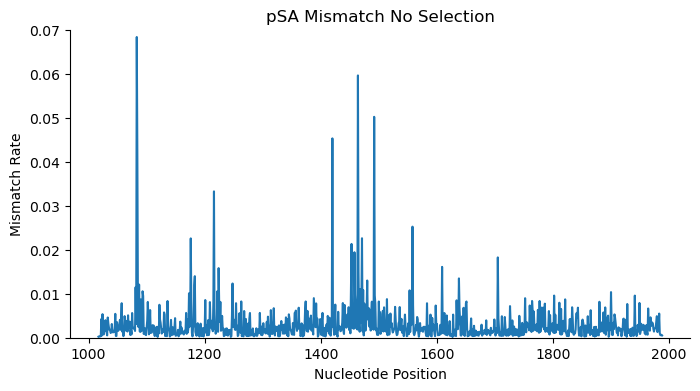

In [70]:
plt.figure(figsize=(8,4))
plt.plot(time_zero.index,time_zero.norm_mismatch)
sns.despine()
plt.title('pSA Mismatch No Selection')
plt.ylim(0,.07)
plt.xlabel('Nucleotide Position')
plt.ylabel('Mismatch Rate')

In [62]:
d_match = []
d_mismatch = []
d_a = []
d_t = []
d_c = []
d_g = []

for row in df_mutant.iterrows():
    temp_zero = time_zero[time_zero.index==row[1].pos]
    d_mismatch.append(row[1].norm_mismatch/temp_zero.norm_mismatch.values[0])
    if row[1].pos == 1083:
        print(row[1].norm_mismatch,temp_zero.norm_mismatch.values[0],row[1].norm_mismatch/temp_zero.norm_mismatch.values[0])
    d_match.append(row[1].norm_match/temp_zero.norm_match.values[0])
    d_a.append(row[1].norm_A/temp_zero.norm_A.values[0])
    d_t.append(row[1].norm_T/temp_zero.norm_T.values[0])
    d_c.append(row[1].norm_C /temp_zero.norm_C.values[0])
    d_g.append(row[1].norm_G/temp_zero.norm_G.values[0])





0.16896657092220252 0.068343428086289 2.472316295121585
0.16896657092220252 0.068343428086289 2.472316295121585
0.11405893226051973 0.068343428086289 1.6689085615739274
0.10915237290354834 0.068343428086289 1.5971158597097999
0.17316602933500921 0.068343428086289 2.5337627067283393
0.1112618363655708 0.068343428086289 1.6279814969933013
0.1656561281940234 0.068343428086289 2.423877947487056


In [35]:
df_mutant['change_mismatch'] = d_mismatch
df_mutant['change_match'] = d_match
df_mutant['change_a'] = d_a
df_mutant['change_t'] = d_t
df_mutant['change_c'] = d_c
df_mutant['change_g'] = d_g


df_mutant

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_91372/3016496591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mutant['change_mismatch'] = d_mismatch
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_91372/3016496591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mutant['change_match'] = d_match
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_91372/3016496591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo,change_mismatch,change_match,change_a,change_t,change_c,change_g
544,Gent_pSa,1017,A,78889,67787,78868,67773,20,14,1,1,1,1,78868,67773,2,2,7,3,11,9,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000254,0.999734,0.999734,0.000089,0.000025,0.000139,Selection_2,M,1,M1,1.087307,0.999981,0.999981,1.201936,0.635647,1.167266
545,Gent_pSa,1018,T,78960,67816,78933,67792,26,24,1,1,1,1,9,8,16,15,78933,67792,1,1,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000329,0.999658,0.000114,0.999658,0.000203,0.000013,Selection_2,M,1,M1,1.082936,0.999972,0.979926,0.999972,1.173451,0.666841
546,Gent_pSa,1019,G,78942,67822,78913,67800,28,22,1,1,1,1,18,14,4,3,6,5,78913,67800,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000355,0.999633,0.000228,0.000076,0.000051,0.999633,Selection_2,M,1,M1,1.366443,0.999897,1.872291,0.661931,2.206436,0.999897
547,Gent_pSa,1020,C,80911,69199,80888,69178,23,21,1,1,1,1,7,6,80888,69178,16,15,1,1,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000284,0.999716,0.000087,0.000198,0.999716,0.000012,Selection_2,P,2,P2,0.924163,1.000028,1.053676,1.041788,1.000028,0.346528
548,Gent_pSa,1021,C,80658,69017,80642,69003,16,14,1,1,1,1,6,6,80642,69003,9,8,1,1,1,1,pSa-selection2-rep1_S7_L001_mapping,0.000198,0.999802,0.000074,0.000112,0.999802,0.000012,Selection_2,P,2,P2,0.568602,1.000151,0.462875,0.725273,1.000151,0.324677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,Gent_pSa,1984,C,78847,68893,78782,68845,65,48,1,1,2,1,28,25,78782,68845,33,20,4,3,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000824,0.999176,0.000355,0.000419,0.999176,0.000051,Selection_2,T,323,T323,0.810838,1.000197,1.075430,0.728243,1.000197,0.453856
1331,Gent_pSa,1985,T,77956,68097,77906,68070,50,27,1,1,5,1,16,8,23,15,77906,68070,11,4,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000641,0.999359,0.000205,0.999359,0.000295,0.000141,Selection_2,T,323,T323,1.082505,0.999970,0.888761,0.999970,1.252667,1.119509
1332,Gent_pSa,1986,T,75087,65534,75046,65509,41,25,1,1,3,1,14,8,24,14,75046,65509,3,3,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000546,0.999454,0.000186,0.999454,0.000320,0.000040,Selection_2,*,324,*324,0.955526,1.000030,1.111948,1.000030,0.933909,0.649441
1333,Gent_pSa,1987,G,74904,65307,74846,65260,58,47,1,1,4,1,47,39,7,4,4,4,74846,65260,1,1,pSa-selection2-rep3_S9_L001_mapping,0.000774,0.999226,0.000627,0.000053,0.000093,0.999226,Selection_2,*,324,*324,1.150920,0.999919,1.100863,1.010353,1.870830,0.999919


In [51]:
df_mutant.sort_values(by='norm_mismatch',ascending=False).head(25)

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo,change_mismatch,change_match,change_a,change_t,change_c,change_g
380,Gent_pSa,1083,G,93881,88217,77624,73089,16257,15128,1,1,1,1,16165,15044,88,80,4,4,77624,73089,1,1,pSa-selection2-rep2_S8_L001_mapping,0.173166,0.826834,0.172186,0.000043,0.000937,0.826834,Selection_2,E,23,E23,2.533763,0.887496,2.537617,0.814489,2.141749,0.887496
610,Gent_pSa,1083,G,81815,71967,67990,59953,13824,12014,1,1,1,1,13748,11951,74,61,2,2,67990,59953,1,1,pSa-selection2-rep1_S7_L001_mapping,0.168967,0.831021,0.168038,0.000024,0.000904,0.831021,Selection_2,E,23,E23,2.472316,0.891991,2.476479,0.467305,2.066629,0.891991
610,Gent_pSa,1083,G,81815,71967,67990,59953,13824,12014,1,1,1,1,13748,11951,74,61,2,2,67990,59953,1,1,pSa-selection2-rep1_S7_L001_mapping,0.168967,0.831021,0.168038,0.000024,0.000904,0.831021,Selection_2,E,23,E23,2.472316,0.891991,2.476479,0.467305,2.066629,0.891991
429,Gent_pSa,1083,G,64652,58452,53939,48829,10710,9621,3,2,1,1,10644,9561,61,55,5,5,53939,48829,1,1,pSa-selection2-rep3_S9_L001_mapping,0.165656,0.834297,0.164635,0.000077,0.000944,0.834297,Selection_2,E,23,E23,2.423878,0.895507,2.426336,1.478397,2.155815,0.895507
235,Gent_pSa,1083,G,45985,38557,40738,34287,5245,4268,2,2,1,1,5199,4229,44,37,2,2,40738,34287,1,1,pSa-selection1-rep3_S6_L001_mapping,0.114059,0.885898,0.113059,0.000043,0.000957,0.885898,Selection_1,E,23,E23,1.668909,0.950893,1.666217,0.831413,2.186252,0.950893
300,Gent_pSa,1083,G,75192,67097,66826,59714,8366,7383,1,1,2,2,8275,7300,86,78,5,5,66826,59714,1,1,pSa-selection1-rep2_S5_L001_mapping,0.111262,0.888738,0.110052,0.000066,0.001144,0.888738,Selection_1,E,23,E23,1.627981,0.953942,1.621901,1.271163,2.613307,0.953942
492,Gent_pSa,1083,G,84011,81959,74841,73056,9170,8903,1,1,1,1,9084,8818,84,83,2,2,74841,73056,1,1,pSa-selection1-rep1_S4_L001_mapping,0.109152,0.890848,0.108129,0.000024,0.001000,0.890848,Selection_1,E,23,E23,1.597116,0.956207,1.593562,0.455089,2.284582,0.956207
430,Gent_pSa,1084,A,66366,59858,61274,55281,5091,4577,1,1,1,1,61274,55281,129,105,418,376,4544,4096,1,1,pSa-selection2-rep3_S9_L001_mapping,0.076711,0.923274,0.923274,0.006298,0.001944,0.068469,Selection_2,E,23,E23,1.850103,0.963240,0.963240,0.870223,1.656802,2.071536
236,Gent_pSa,1084,A,47504,39657,43938,36693,3564,2962,2,2,1,1,43938,36693,119,98,294,245,3151,2619,1,1,pSa-selection1-rep3_S6_L001_mapping,0.075025,0.924933,0.924933,0.006189,0.002505,0.066331,Selection_1,E,23,E23,1.809447,0.964970,0.964970,0.855100,2.135224,2.006864
611,Gent_pSa,1084,A,83784,73501,77631,68109,6151,5390,2,2,1,1,77631,68109,174,145,529,464,5448,4781,1,1,pSa-selection2-rep1_S7_L001_mapping,0.073415,0.926561,0.926561,0.006314,0.002077,0.065024,Selection_2,E,23,E23,1.770610,0.966670,0.966670,0.872357,1.770169,1.967323


In [52]:
df_noselect.sort_values(by='norm_mismatch',ascending=False).head(25)

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo
239,Gent_pSa,1083,G,67003,56239,61799,51901,5203,4337,1,1,1,1,5161,4305,37,28,5,4,61799,51901,1,1,pSa-unselected-rep1_S1_L001_mapping,0.077653,0.922332,0.077026,0.000075,0.000552,0.922332,No_Selection,E,23,E23
422,Gent_pSa,1083,G,63919,59033,59766,55231,4153,3802,1,1,1,1,4127,3778,23,21,3,3,59766,55231,1,1,pSa-unselected-rep3_S3_L001_mapping,0.064973,0.935027,0.064566,0.000047,0.000360,0.935027,No_Selection,E,23,E23
648,Gent_pSa,1492,T,135208,106285,126524,99482,8684,6803,1,1,9,1,7741,6064,215,165,126524,99482,728,574,1,1,pSa-unselected-rep1_S1_L001_mapping,0.064227,0.935773,0.057253,0.935773,0.001590,0.005384,No_Selection,L,159,L159
261,Gent_pSa,1083,G,84802,80037,79509,75059,5292,4977,1,1,1,1,5255,4945,34,29,3,3,79509,75059,1,1,pSa-unselected-rep2_S2_L001_mapping,0.062404,0.937584,0.061968,0.000035,0.000401,0.937584,No_Selection,E,23,E23
803,Gent_pSa,1464,A,118993,105495,111800,99141,7191,6352,2,2,4,1,111800,99141,44,36,7039,6223,108,93,1,1,pSa-unselected-rep3_S3_L001_mapping,0.060432,0.939551,0.939551,0.059155,0.000370,0.000908,No_Selection,N,150,N150
620,Gent_pSa,1464,A,135061,106595,126994,100242,8065,6351,2,2,6,1,126994,100242,49,29,7883,6222,133,100,1,1,pSa-unselected-rep1_S1_L001_mapping,0.059714,0.940271,0.940271,0.058366,0.000363,0.000985,No_Selection,N,150,N150
642,Gent_pSa,1464,A,150497,137055,141664,129030,8832,8024,1,1,1,1,141664,129030,64,58,8659,7874,109,92,1,1,pSa-unselected-rep2_S2_L001_mapping,0.058686,0.941308,0.941308,0.057536,0.000425,0.000724,No_Selection,N,150,N150
576,Gent_pSa,1420,T,134948,106434,128534,101377,6414,5057,1,1,1,1,3873,3077,2366,1838,128534,101377,175,142,1,1,pSa-unselected-rep1_S1_L001_mapping,0.047529,0.952471,0.028700,0.952471,0.017533,0.001297,No_Selection,M,135,M135
759,Gent_pSa,1420,T,118954,105373,113611,100666,5343,4707,1,1,1,1,3092,2729,2137,1875,113611,100666,114,103,1,1,pSa-unselected-rep3_S3_L001_mapping,0.044917,0.955083,0.025993,0.955083,0.017965,0.000958,No_Selection,M,135,M135
831,Gent_pSa,1492,T,117521,103894,112346,99340,5175,4554,1,1,3,1,4672,4110,119,112,112346,99340,384,332,1,1,pSa-unselected-rep3_S3_L001_mapping,0.044035,0.955965,0.039755,0.955965,0.001013,0.003268,No_Selection,L,159,L159


In [36]:
df_mutant.to_csv('Matthew_Rawish_pSa_data.csv')

In [37]:
mutant_means = df_mutant.groupby(by=['Group','pos','ref','AApos','AA','AAInfo']).mean()
mutant_means

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_91372/1969063143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mutant_means = df_mutant.groupby(by=['Group','pos','ref','AApos','AA','AAInfo']).mean()


reads_all      reads_pp  \
Group       pos  ref AApos AA AAInfo                               
Selection_1 1017 A   1     M  M1      67431.333333  60263.333333   
            1018 T   1     M  M1      67517.666667  60345.000000   
            1019 G   1     M  M1      67406.333333  60269.666667   
            1020 C   2     P  P2      68986.666667  61498.333333   
            1021 C   2     P  P2      68719.666667  61281.666667   
...                                            ...           ...   
Selection_2 1984 C   323   T  T323    92636.250000  80893.000000   
            1985 T   323   T  T323    91532.250000  79897.500000   
            1986 T   324   *  *324    88153.750000  76896.500000   
            1987 G   324   *  *324    87886.000000  76589.000000   
            1988 A   324   *  *324    87769.750000  76446.500000   

                                           matches    matches_pp  mismatches  \
Group       pos  ref AApos AA AAInfo                                           
Selection_1 1017 A   1     M  M1      67412.000000  60247.000000   19.333333   
            1018 T   1     M  M1      67495.333333  60326.333333   21.666667   
            1019 G   1     M  M1      67379.333333  60248.666667   27.000000   
            1020 C   2     P  P2      68968.333333  61482.666667   17.333333   
            1021 C   2     P  P2      68701.333333  61264.666667   18.333333   
...                                            ...           ...         ...   
Selection_2 1984 C   323   T  T323    92567.250000  80839.250000   69.000000   
            1985 T   323   T  T323    91471.500000  79857.000000   60.250000   
            1986 T   324   *  *324    88105.000000  76861.750000   48.750000   
            1987 G   324   *  *324    87832.000000  76545.250000   53.750000   
            1988 A   324   *  *324    87723.500000  76419.250000   46.250000   

                                      mismatches_pp  deletions  deletions_pp  \
Group       pos  ref AApos AA AAInfo                                           
Selection_1 1017 A   1     M  M1          16.333333   1.000000      1.000000   
            1018 T   1     M  M1          18.333333   1.000000      1.000000   
            1019 G   1     M  M1          21.000000   1.000000      1.000000   
            1020 C   2     P  P2          14.666667   1.333333      1.333333   
            1021 C   2     P  P2          17.000000   1.000000      1.000000   
...                                             ...        ...           ...   
Selection_2 1984 C   323   T  T323        53.750000   1.000000      1.000000   
            1985 T   323   T  T323        40.000000   1.000000      1.000000   
            1986 T   324   *  *324        34.750000   1.000000      1.000000   
            1987 G   324   *  *324        43.500000   1.000000      1.000000   
            1988 A   324   *  *324        27.250000   1.000000      1.000000   

                                      insertions  insertions_pp             A  \
Group       pos  ref AApos AA AAInfo                                            
Selection_1 1017 A   1     M  M1            1.00            1.0  67412.000000   
            1018 T   1     M  M1            1.00            1.0      6.666667   
            1019 G   1     M  M1            1.00            1.0     15.000000   
            1020 C   2     P  P2            1.00            1.0      6.000000   
            1021 C   2     P  P2            1.00            1.0      6.333333   
...                                          ...            ...           ...   
Selection_2 1984 C   323   T  T323          2.25            1.0     28.000000   
            1985 T   323   T  T323          4.25            1.0     20.500000   
            1986 T   324   *  *324          5.25            1.0     16.500000   
            1987 G   324   *  *324          6.00            1.0     43.500000   
            1988 A   324   *  *324          1.00            1.0  87723.500000   

                    

In [38]:
mutant_means = mutant_means.reset_index()

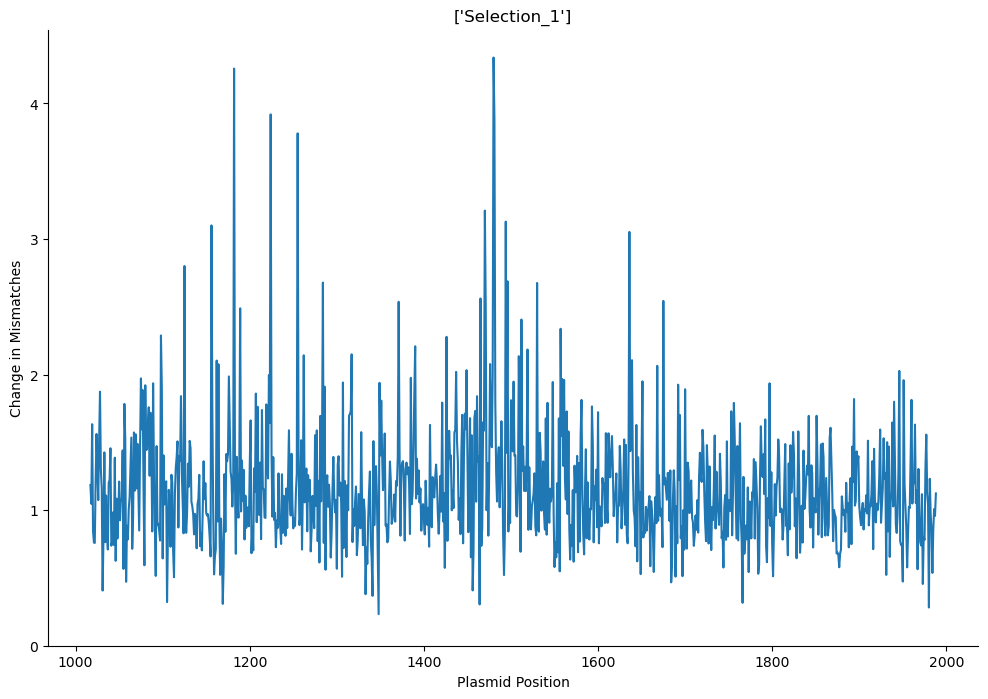

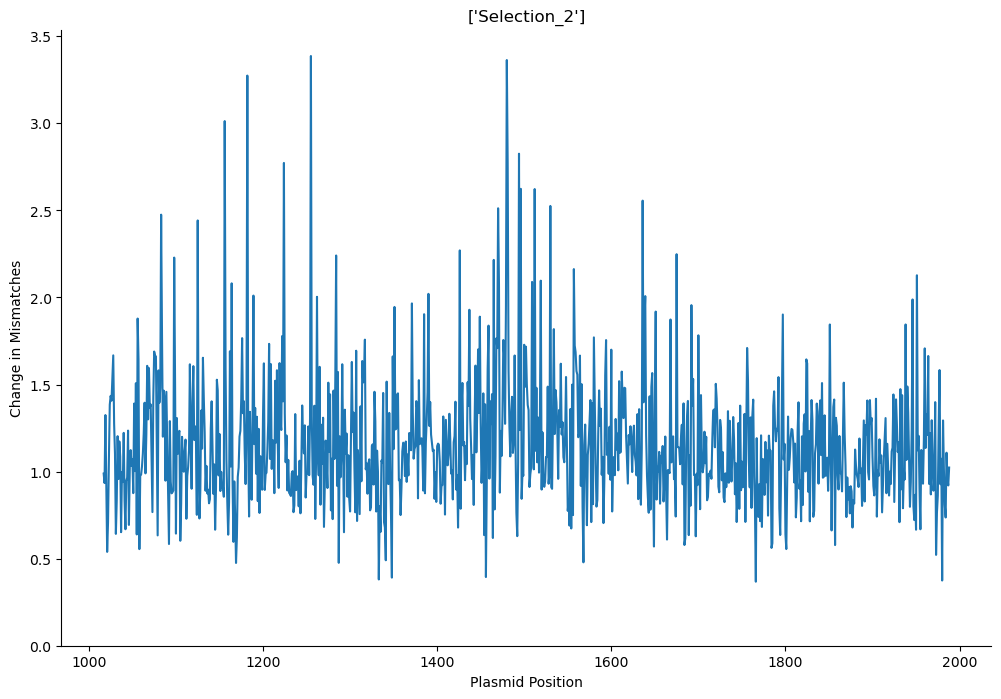

In [39]:
for cond in mutant_means.Group.unique():
    plt.figure(figsize=(12,8))
    plt.plot(mutant_means[mutant_means.Group==cond].pos,mutant_means[mutant_means.Group==cond].change_mismatch)
    plt.ylim(0,)
    plt.title(mutant_means[mutant_means.Group==cond].Group.unique())
    plt.ylabel('Change in Mismatches')
    plt.xlabel('Plasmid Position')
    sns.despine()

In [41]:
for x in [2,2.5,3]:
    print(x,len(mutant_means[mutant_means.change_mismatch>x].pos.unique()))



2 38
2.5 18
3 9


In [42]:
selected_snps = mutant_means[mutant_means.change_mismatch>2].pos.unique()

In [43]:
mutant_means[mutant_means.pos.isin(selected_snps)].sort_values(by='pos').to_csv('mathew_selected_pSamuts.csv')

Text(0.5, 1.0, 'pSa')

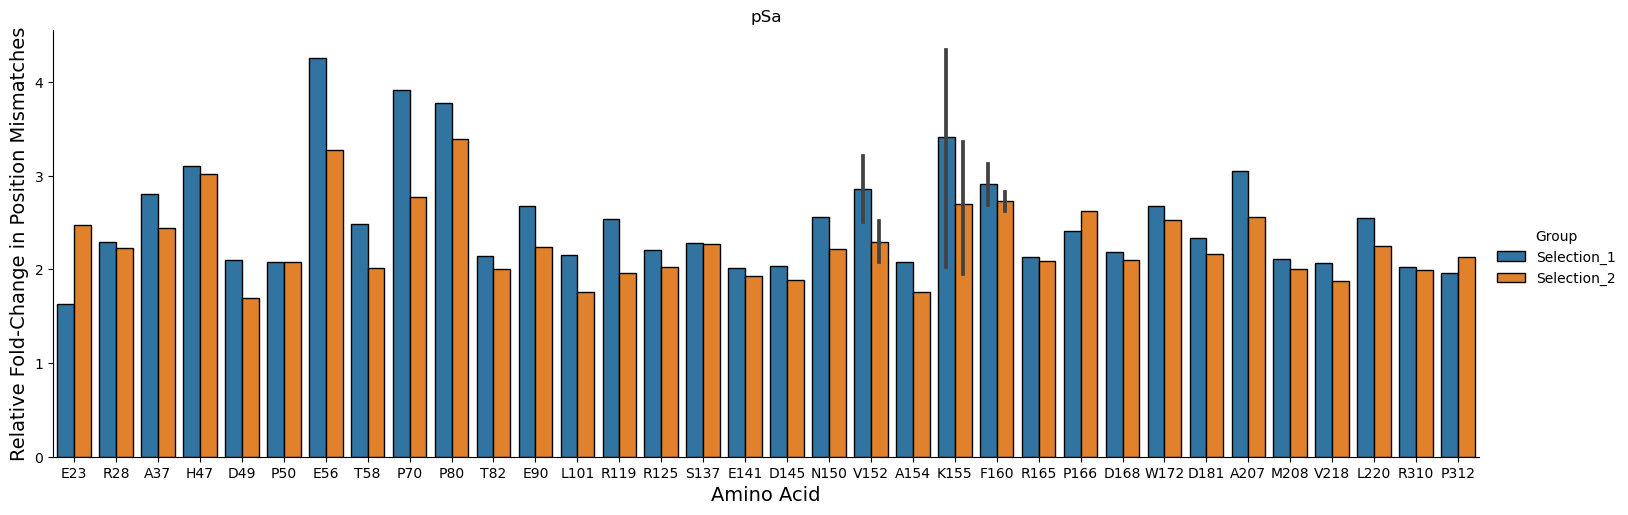

In [45]:
sns.catplot(data=mutant_means[mutant_means.pos.isin(selected_snps)],
            x='AAInfo',y='change_mismatch',hue='Group',kind='bar',aspect=3,edgecolor='black')
plt.ylabel('Relative Fold-Change in Position Mismatches',size=14)
plt.xlabel('Amino Acid',size=14)
plt.title('pSa')

In [ ]:
#https://www.uniprot.org/uniprotkb/P07676/entry
#put AA at each position